In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [390]:
dataframe=pd.read_csv('dailyclimate.csv', index_col='Date')

In [391]:
dataframe.head(3)

,Unnamed: 0,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1981-01-02,1,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
1981-01-03,2,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15


In [392]:
kathmandu=dataframe[dataframe['District']=='Kathmandu']

In [393]:
kathmandu.head(3)

,Unnamed: 0,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,413076,Kathmandu,27.7,85.3,0.0,84.02,4.10,47.94,9.04,-1.96,...,10.98,6.15,1.74,4.35,0.50,3.85,1.75,3.71,0.68,3.03
1981-01-02,413077,Kathmandu,27.7,85.3,0.0,84.08,4.25,49.83,9.00,-1.47,...,10.06,6.06,1.53,3.96,0.35,3.62,1.48,3.21,0.33,2.88
1981-01-03,413078,Kathmandu,27.7,85.3,0.0,84.04,4.72,55.99,8.84,0.11,...,9.41,6.58,1.71,3.70,0.49,3.21,1.80,3.14,0.65,2.49


In [394]:
kathmandu=kathmandu.drop(columns=['Unnamed: 0'])

In [395]:
kathmandu.head(1)

,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,MaxTemp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,Kathmandu,27.7,85.3,0.0,84.02,4.1,47.94,9.04,-1.96,15.71,...,10.98,6.15,1.74,4.35,0.5,3.85,1.75,3.71,0.68,3.03


In [396]:
kathmandu.columns

Index(['District', 'Latitude', 'Longitude', 'Precip', 'Pressure',
       'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m', 'MaxTemp_2m',
       'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp', 'WindSpeed_10m',
       'MaxWindSpeed_10m', 'MinWindSpeed_10m', 'WindSpeedRange_10m',
       'WindSpeed_50m', 'MaxWindSpeed_50m', 'MinWindSpeed_50m',
       'WindSpeedRange_50m'],
      dtype='object')

In [397]:
kathmandu=kathmandu[['Temp_2m', 'MaxTemp_2m', 'MinTemp_2m']].copy()

In [398]:
kathmandu.head(1)

,Temp_2m,MaxTemp_2m,MinTemp_2m
Date,,,
1981-01-01,9.04,15.71,4.73


In [399]:
kathmandu.isna().sum()

,0
Temp_2m,0
MaxTemp_2m,0
MinTemp_2m,0


In [400]:
kathmandu.describe()

,Temp_2m,MaxTemp_2m,MinTemp_2m
count,14244.000000,14244.000000,14244.000000
mean,16.860930,22.588764,12.476985
std,5.135011,4.663958,5.282171
min,2.520000,6.410000,-2.010000
25%,12.370000,18.827500,7.910000
50%,18.270000,23.110000,13.200000
75%,21.130000,25.970000,17.500000
max,27.130000,34.330000,21.320000


In [401]:
kathmandu.shape

(14244, 3)

In [402]:
kathmandu['target']=kathmandu['Temp_2m'].shift(-1)

In [403]:
train=kathmandu.loc[:'2016-12-31']

In [404]:
train.head(1)

,Temp_2m,MaxTemp_2m,MinTemp_2m,target
Date,,,,
1981-01-01,9.04,15.71,4.73,9.0


In [405]:
test=kathmandu.loc['2017-01-01':]

In [406]:
test.head(1)

,Temp_2m,MaxTemp_2m,MinTemp_2m,target
Date,,,,
2017-01-01,9.8,14.27,6.75,9.0


In [407]:
test.isnull().sum()

,0
Temp_2m,0
MaxTemp_2m,0
MinTemp_2m,0
target,1


In [408]:
test=test.dropna()

In [409]:
model=LinearRegression()

In [410]:
model.fit(train[['Temp_2m']], train[['target']])

LinearRegression()

In [411]:
prediction=model.predict(test[['Temp_2m']])

In [412]:
mae(test[['target']], prediction)

0.6019475447088187

In [413]:
kathmandu_predicted=pd.DataFrame({'actual':test['target'], 'prediction':prediction.flatten(), 'difference':test['target']-prediction.flatten()})

In [414]:
kathmandu_predicted.head(3)

,actual,prediction,difference
Date,,,
2017-01-01,9.00,9.876423,-0.876423
2017-01-02,9.16,9.085069,0.074931
2017-01-03,9.16,9.243340,-0.083340


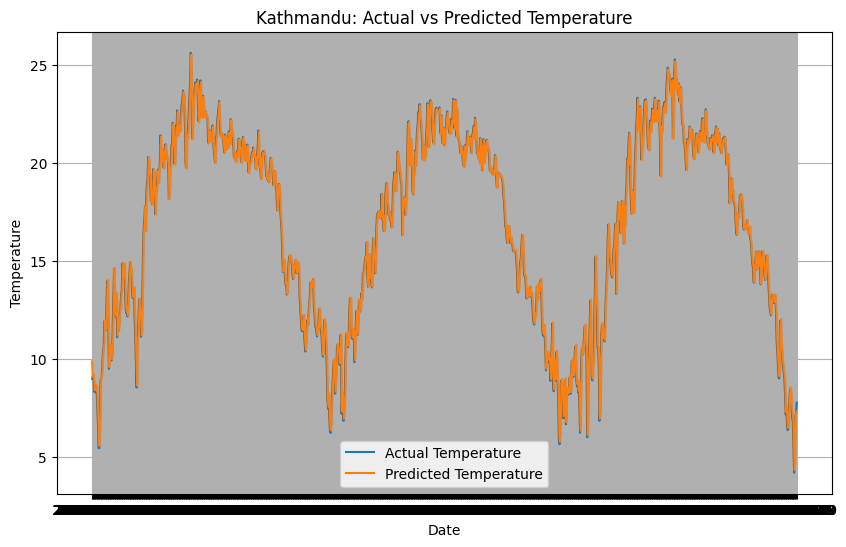

In [415]:
plt.figure(figsize=(10, 6))
plt.plot(kathmandu_predicted['actual'], label='Actual Temperature')
plt.plot(kathmandu_predicted['prediction'], label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Kathmandu: Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()

**District: Kaski**

In [416]:
kaski=dataframe[dataframe['District']=='Kaski']

In [417]:
kaski=kaski.drop(columns=['Unnamed: 0'])

In [418]:
kaski=kaski[['Temp_2m', 'MaxTemp_2m', 'MinTemp_2m']].copy()

In [419]:
kaski['target']=kaski['Temp_2m'].shift(-1)

In [420]:
train_kaski=kaski.loc[:'2016-12-31']

In [421]:
test_kaski=kaski.loc['2017-01-01':]

In [422]:
test_kaski=test_kaski.dropna()

In [423]:
test_kaski.isnull().sum()

,0
Temp_2m,0
MaxTemp_2m,0
MinTemp_2m,0
target,0


In [424]:
kaski_model=LinearRegression()

In [425]:
kaski_model.fit(train_kaski[['Temp_2m']], train_kaski[['target']])

LinearRegression()

In [426]:
kaski_prediction=kaski_model.predict(test_kaski[['Temp_2m']])

In [427]:
mae(test_kaski[['target']], kaski_prediction)

0.6394393822171544

In [428]:
kaski_predicted=pd.DataFrame({'actual':test_kaski['target'], 'prediction':kaski_prediction.flatten(), 'difference':test_kaski['target']-kaski_prediction.flatten()})

In [429]:
kaski_predicted

,actual,prediction,difference
Date,,,
2017-01-01,4.30,5.100288,-0.800288
2017-01-02,4.88,4.398315,0.481685
2017-01-03,5.20,4.971758,0.228242
2017-01-04,3.99,5.288140,-1.298140
2017-01-05,4.11,4.091820,0.018180
...,...,...,...
2019-12-26,-0.36,1.531104,-1.891104
2019-12-27,0.83,-0.208997,1.038997
2019-12-28,3.11,0.967549,2.142451


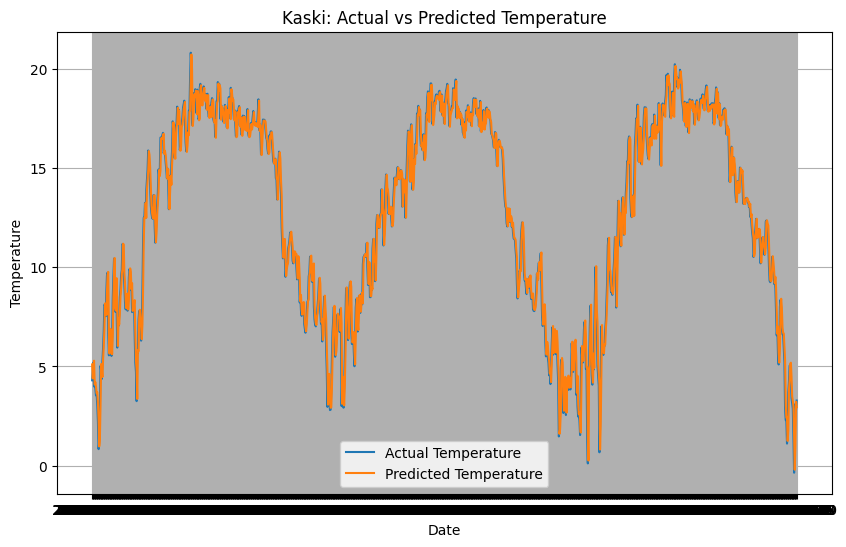

In [430]:
plt.figure(figsize=(10, 6))
plt.plot(kaski_predicted['actual'], label='Actual Temperature')
plt.plot(kaski_predicted['prediction'], label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Kaski: Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()